# STATISTICAL ANALYSIS IN PYTHON BY CHOOSING PCA METHOD

## Throughout the Notebook I will describe the steps taken and explain the reason for some of my decisions.

# 1.- DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_original = pd.read_csv('Seasons_Stats.csv')

In [3]:
df_original.head(5)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [4]:
df_original.rename(columns = {'Unnamed: 0' : 'Index'}, inplace = True)
df_original

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


### We are going to create a mask with a 'Player' to see if all the data is the same and thus be able to analyze and decide if we eliminate duplicates.

In [5]:
df_original[df_original.Player == 'Ed Bartels']

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
317,317,1951.0,Ed Bartels,F,25.0,WSC,17.0,NaN,NaN,NaN,...,0.522,NaN,NaN,84.0,12.0,NaN,NaN,NaN,54.0,72.0


### From what can be observed, the data is different, so eliminating duplicates is not going to favor us in this DataFrame, anyway it is done to confirm the above.

In [6]:
df_not_duplicates = df_original.drop_duplicates()
df_not_duplicates

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


### Now we will clean both the columns and the rows that do not have ANY records, since those columns/rows are of no use to us.

In [7]:
df_not_nan = df_not_duplicates.dropna(axis = 1,how = 'all')
df_not_nan

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [8]:
df_not_nan.dropna(axis = 0,how = 'all', inplace = True)
df_not_nan

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


### Now we will see from our 'Player' column, how many do not have records, since if the name of the player does not exist we do not know who we are analyzing, which curiously is the same quantity as 'Year', therefore we do not have to do a dropna to that column too.

In [9]:
df_not_nan[df_not_nan.Player.isna()]

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
312,312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21678,21678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22252,22252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22864,22864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23516,23516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_not_nan.dropna(subset = ['Player'], inplace = True)
df_not_nan

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


### Here I want to check if there is any other column that does not work for me if it has a NaN value, but apparently there is no other.

In [11]:
df_not_nan.columns

Index(['Index', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

In [12]:
print(len(df_not_nan))

24624


In [16]:
## Do not run because a list is formed (51 columns) 
# Remove the '##' from the last line to see the different count of all columns
for i in df_not_nan.columns:
    cuenta = df_not_nan[i].value_counts()
    ##print(f'The column is called {i}\n{cuenta}')

In [15]:
df_not_nan.dtypes

Index       int64
Year      float64
Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

### Now we are going to check if there is any WRONG WRITTEN data in any column or analyze why it is that way.

In [17]:
def convert_type(x,dtype):
    if dtype == 'str':
        try:
            out = str(x)
            return 'str'
        except:
            print(f'error este registro no es string = {x}')
            return type(x)
    elif dtype == 'float':
        try:
            out = float(x)
            return 'float'
        except:
            print(f'error este registro no es float = {x}')
            return type(x)
    elif dtype == 'int':
        try:
            out = int(x)
            return 'int'
        except:
            print(f'error este registro no es integer = {x}')
            return type(x)

### The columns that we are not clear about are 'Player', 'Pos' and 'Tm', in none of them is there any type of data that should not be there, therefore they look good.

In [18]:
df_not_nan['type_player']=df_not_nan.Player.apply(lambda x: convert_type(x,'str'))
df_not_nan['type_player'].value_counts()

str    24624
Name: type_player, dtype: int64

In [19]:
df_not_nan['type_position']=df_not_nan.Pos.apply(lambda x: convert_type(x,'str'))
df_not_nan['type_position'].value_counts()

str    24624
Name: type_position, dtype: int64

In [20]:
df_not_nan['type_team']=df_not_nan.Tm.apply(lambda x: convert_type(x,'str'))
df_not_nan['type_team'].value_counts()

str    24624
Name: type_team, dtype: int64

# DATA CLEANING ENDS HERE.

### Now I want to write code to see some data that interests me from certain columns.

In [21]:
df_not_nan['GS'] [19940:24690]

20000     0.0
20001    37.0
20002    37.0
20003     0.0
20004     1.0
         ... 
24686    58.0
24687     5.0
24688     0.0
24689    18.0
24690    11.0
Name: GS, Length: 4684, dtype: float64

In [22]:
df_not_nan['PTS'].describe()

count    24624.000000
mean       510.116350
std        492.922981
min          0.000000
25%        106.000000
50%        364.000000
75%        778.000000
max       4029.000000
Name: PTS, dtype: float64

### According to the above, I chose only 8 columns which I think are more relevant.

#### Which are Year, Player, Position, Games, Games Started (since 1982), Minutes Played (since 1952), Player Efficiency Rating (since 1952) and Points.

In [23]:
df_drop_columns = df_not_nan.drop(columns = (['Index', 'Age', 'Tm', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%','TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM','VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '2P', '2PA', '2P%','eFG%', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK','TOV', 'PF', 'type_player', 'type_position', 'type_team', '3P%', 'FT%']))

In [24]:
df_drop_columns

,Year,Player,Pos,G,GS,MP,PER,PTS
0,1950.0,Curly Armstrong,G-F,63.0,NaN,NaN,NaN,458.0
1,1950.0,Cliff Barker,SG,49.0,NaN,NaN,NaN,279.0
2,1950.0,Leo Barnhorst,SF,67.0,NaN,NaN,NaN,438.0
3,1950.0,Ed Bartels,F,15.0,NaN,NaN,NaN,63.0
4,1950.0,Ed Bartels,F,13.0,NaN,NaN,NaN,59.0
...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,62.0,58.0,1725.0,16.7,639.0
24687,2017.0,Tyler Zeller,C,51.0,5.0,525.0,13.0,178.0
24688,2017.0,Stephen Zimmerman,C,19.0,0.0,108.0,7.3,23.0
24689,2017.0,Paul Zipser,SF,44.0,18.0,843.0,6.9,240.0


### Now we do a statistical summary to see if we can observe any Outlier, those of GS, MP, PER and PTS call my attention.

In [25]:
df_drop_columns.describe()

,Year,G,GS,MP,PER,PTS
count,24624.000000,24624.000000,18233.000000,24138.000000,24101.000000,24624.000000
mean,1992.594989,50.837110,23.593375,1209.720317,12.479071,510.116350
std,17.429594,26.496161,28.632387,941.146575,6.039014,492.922981
min,1950.000000,1.000000,0.000000,0.000000,-90.600000,0.000000
25%,1981.000000,27.000000,0.000000,340.000000,9.800000,106.000000
50%,1996.000000,58.000000,8.000000,1053.000000,12.700000,364.000000
75%,2007.000000,75.000000,45.000000,1971.000000,15.600000,778.000000
max,2017.000000,88.000000,83.000000,3882.000000,129.100000,4029.000000


### This line helps me to observe data from my variables.

In [26]:
df_drop_columns[df_drop_columns['MP'] == 0]

,Year,Player,Pos,G,GS,MP,PER,PTS
17787,2006.0,Josh Davis,PF,1.0,0.0,0.0,NaN,0.0
18104,2006.0,Alex Scales,SG,1.0,0.0,0.0,NaN,0.0
19069,2008.0,Stephane Lasme,SF,1.0,0.0,0.0,NaN,0.0
20041,2010.0,JamesOn Curry,PG,1.0,0.0,0.0,NaN,0.0
21932,2013.0,Damion James,SF,2.0,0.0,0.0,NaN,0.0


# 2.- OUTLIER ANALYSIS

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

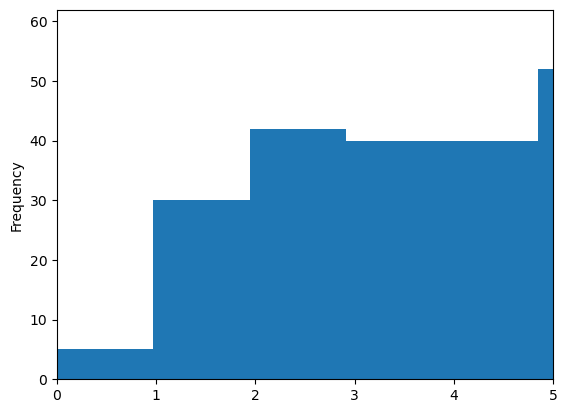

In [28]:
df_drop_columns.MP.plot(kind='hist',bins=4000)
plt.xlim(0,5)
plt.show()

### We are going to analyze all the numerical variables chosen one by one with the types of graphs of: Histogram, Box and Scatter.

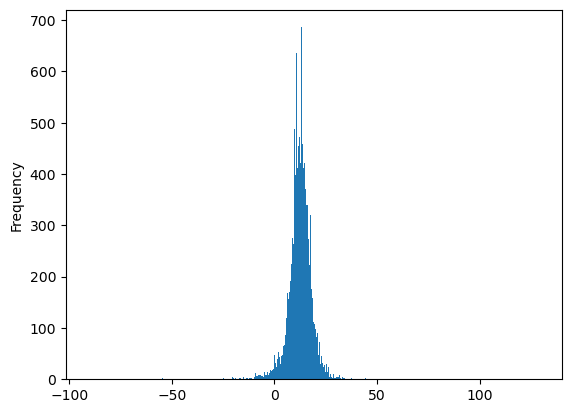

In [29]:
df_drop_columns.PER.plot(kind='hist',bins=1000)
plt.show()

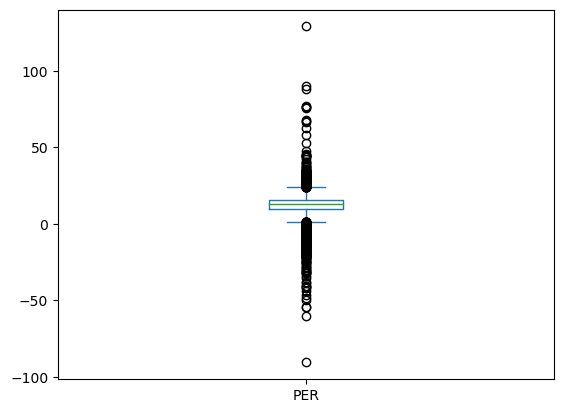

In [30]:
df_drop_columns['PER'].plot(kind='box')
## plt.ylim(-10,30) Por si se necesita hacer un zoom
plt.show()

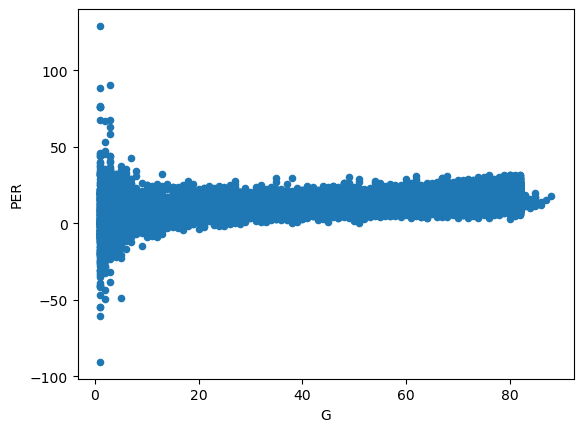

In [31]:
df_drop_columns.plot.scatter(x='G',y='PER')
## plt.xlim(-2,8) ## por si se necesita para hacer zoom
## plt.ylim(0,4100)
plt.show()

### According to what is observed in the graphs, I am going to choose only PER to eliminate outliers, PTS also indicate their graphs that there are some atypical data but they are totally reasonable.

In [32]:
def find_outliers_IQR(df_drop_columns):
    q1 = df_drop_columns.quantile(0.25)
    q3 = df_drop_columns.quantile(0.75)
    IQ_range = q3 - q1
    outliers = df_drop_columns[((df_drop_columns<(q1 - 1.5 * IQ_range)) | (df_drop_columns>(q3 + 1.5 * IQ_range)))]
    return outliers

### The next line is to find the outliers of the PTS column according to the function.

In [33]:
outliers_PTS = find_outliers_IQR(df_drop_columns['PTS'])
##outliers_PTS.index.to_list() ## this list are the records to be deleted

In [34]:
print('number of outliers: ', len(outliers_PTS))
print('max outlier value: ',outliers_PTS.max())
print('min outlier value: ',outliers_PTS.min())

number of outliers:  523
max outlier value:  4029.0
min outlier value:  1787.0


### This helped me because I wanted to analyze some data according to the position of the players.

In [35]:
df_drop_columns['Pos'].value_counts()

PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
SG-PG      27
PF-C       27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
SF-PG       1
PG-SF       1
Name: Pos, dtype: int64

### All these lines are to calculate the range of the outliers for all the fields that were chosen.

In [36]:
q1 = df_drop_columns.quantile(0.25)
q1

Year    1981.0
G         27.0
GS         0.0
MP       340.0
PER        9.8
PTS      106.0
Name: 0.25, dtype: float64

In [37]:
q3 = df_drop_columns.quantile(0.75)
q3

Year    2007.0
G         75.0
GS        45.0
MP      1971.0
PER       15.6
PTS      778.0
Name: 0.75, dtype: float64

In [38]:
IQ_range = q3 - q1
IQ_range
## For PER 1.5*IQ_range = 8.7, el rango va de 1.1 a 24.3
## For PTS 1.5*IQ_range = 1,008, el rango va de -902 a 1,786

Year      26.0
G         48.0
GS        45.0
MP      1631.0
PER        5.8
PTS      672.0
dtype: float64

### As can be seen, PTS is still taken into account but the outliers will not be eliminated due to:

#### Observing and analyzing both data and graphs, there are atypical data (such as 0 and 4,029), however, they are totally allowed and reasonable seeing the correlation with the other variables (G,GS and MP). I consider that if they are eliminated it would not be correct.

In [39]:
df_outliers = find_outliers_IQR(df_drop_columns[['PER','PTS']])

In [41]:
df_outliers.describe() ##This DataFrame is no longer used, it is just to observe

,PER,PTS
count,1155.000000,523.000000
mean,6.495152,2057.543021
std,19.339365,257.781947
min,-90.600000,1787.000000
25%,-4.850000,1869.500000
50%,0.000000,1989.000000
75%,25.400000,2175.000000
max,129.100000,4029.000000


### Here the calculation is made and the ALLOWED ranges for each variable are shown. Any data that is outside these ranges is considered an outlier by the function or statistical method used.

In [42]:
q1=df_drop_columns.quantile(0.25)
q3=df_drop_columns.quantile(0.75)
rango=q3-q1
upper=q3+rango*1.5
lower=q1-rango*1.5
print(lower)
print(upper)

Year    1942.0
G        -45.0
GS       -67.5
MP     -2106.5
PER        1.1
PTS     -902.0
dtype: float64
Year    2046.0
G        147.0
GS       112.5
MP      4417.5
PER       24.3
PTS     1786.0
dtype: float64


### As a review and that everything has gone correctly with the method, a record for PTS is verified, which must not be between the values -902 and 1786 (since the method identifies these last numbers as outliers as well).

In [43]:
df_outliers ## This DataFrame is no longer used, it is just to observe

,PER,PTS
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
24686,NaN,NaN
24687,NaN,NaN
24688,NaN,NaN
24689,NaN,NaN


In [44]:
df_drop_columns['PTS'] [172]

1865.0

### We are going to eliminate all the PER records, however, it will not be done with the previously seen method, but rather with the Z-SCORE one, since the variable has a Gaussian behavior, which we are going to calculate next.

In [47]:
#Mean
PERmean=df_drop_columns.PER.mean()
print(f'Mean = {PERmean}')
#Standard Deviation
PERstd=df_drop_columns.PER.std()
print(f'Deviation = {PERstd}')
# Lower and upper limits at 3 sigma
rango_inf=PERmean-3*PERstd
rango_sup=PERmean+3*PERstd
print(f'Lower Range = {rango_inf}')
print(f'Upper Range = {rango_sup}')

Mean = 12.479071407825446
Deviation = 6.039013561620132
Lower Range = -5.637969277034953
Upper Range = 30.596112092685843


In [48]:
df_drop_columns['PER_outlier_manual']=df_drop_columns.PER.apply(lambda x: False if (x<=rango_sup and x>=rango_inf) else True )

In [49]:
df_drop_columns.sample(2)

,Year,Player,Pos,G,GS,MP,PER,PTS,PER_outlier_manual
7698,1985.0,George Johnson,SF,55.0,3.0,756.0,9.9,264.0,False
2321,1966.0,Rod Thorn,SG,27.0,NaN,815.0,12.5,376.0,False


In [50]:
df_drop_columns['PER_outlier_manual'].value_counts()

False    23753
True       871
Name: PER_outlier_manual, dtype: int64

### The list is not shown because there are 871 records in PER.

list_outliers_PER = df_drop_columns[df_drop_columns['PER_outlier_manual']==True].index.to_list()
#list_outliers_PER

## PER outliers are removed.

In [53]:
df_not_outliers = df_drop_columns.drop(axis=0,index=list_outliers_PER)

In [54]:
df_not_outliers.shape

(23753, 9)

In [55]:
df_not_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23753 entries, 488 to 24690
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                23753 non-null  float64
 1   Player              23753 non-null  object 
 2   Pos                 23753 non-null  object 
 3   G                   23753 non-null  float64
 4   GS                  17938 non-null  float64
 5   MP                  23753 non-null  float64
 6   PER                 23753 non-null  float64
 7   PTS                 23753 non-null  float64
 8   PER_outlier_manual  23753 non-null  bool   
dtypes: bool(1), float64(6), object(2)
memory usage: 1.7+ MB


In [56]:
df_not_outliers.drop(columns = (['PER_outlier_manual']), inplace = True)
df_not_outliers

,Year,Player,Pos,G,GS,MP,PER,PTS
488,1952.0,Paul Arizin*,SF,66.0,NaN,2939.0,25.5,1674.0
489,1952.0,Cliff Barker,SG,44.0,NaN,494.0,10.8,126.0
490,1952.0,Don Barksdale*,PF,62.0,NaN,2014.0,15.8,781.0
491,1952.0,Leo Barnhorst,SF,66.0,NaN,2344.0,15.9,820.0
492,1952.0,Elmer Behnke,C,4.0,NaN,55.0,7.8,16.0
...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,62.0,58.0,1725.0,16.7,639.0
24687,2017.0,Tyler Zeller,C,51.0,5.0,525.0,13.0,178.0
24688,2017.0,Stephen Zimmerman,C,19.0,0.0,108.0,7.3,23.0
24689,2017.0,Paul Zipser,SF,44.0,18.0,843.0,6.9,240.0


# 3.- MISSING DATA (NaN)

### The NaN are analyzed and it is resolved what will be done with them.

In [60]:
import missingno as msno # library for treatment of missing data

In [59]:
df_limpieza = df_not_outliers
fil=df_limpieza.shape[0]
col=df_limpieza.shape[1]
print(f'Dataset has {fil} rows and {col} columns.')
df_limpieza.head(5)

Dataset has 23753 rows and 8 columns.


,Year,Player,Pos,G,GS,MP,PER,PTS
488,1952.0,Paul Arizin*,SF,66.0,NaN,2939.0,25.5,1674.0
489,1952.0,Cliff Barker,SG,44.0,NaN,494.0,10.8,126.0
490,1952.0,Don Barksdale*,PF,62.0,NaN,2014.0,15.8,781.0
491,1952.0,Leo Barnhorst,SF,66.0,NaN,2344.0,15.9,820.0
492,1952.0,Elmer Behnke,C,4.0,NaN,55.0,7.8,16.0


In [61]:
df_limpieza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23753 entries, 488 to 24690
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    23753 non-null  float64
 1   Player  23753 non-null  object 
 2   Pos     23753 non-null  object 
 3   G       23753 non-null  float64
 4   GS      17938 non-null  float64
 5   MP      23753 non-null  float64
 6   PER     23753 non-null  float64
 7   PTS     23753 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.6+ MB


In [62]:
df_limpieza.describe()

,Year,G,GS,MP,PER,PTS
count,23753.000000,23753.000000,17938.000000,23753.000000,23753.000000,23753.000000
mean,1993.464573,51.657601,23.921898,1225.588347,12.665798,519.426767
std,16.491272,26.114769,28.676017,936.025949,4.870825,492.292989
min,1952.000000,1.000000,0.000000,1.000000,-5.600000,0.000000
25%,1982.000000,29.000000,0.000000,366.000000,9.900000,115.000000
50%,1996.000000,58.000000,9.000000,1078.000000,12.700000,378.000000
75%,2007.000000,76.000000,46.000000,1980.000000,15.600000,791.000000
max,2017.000000,88.000000,83.000000,3836.000000,30.400000,3041.000000


### It is observed how many records are missing per column and analyze if any imputation method can be used or just eliminate them.

In [63]:
df_limpieza.isna().sum()

Year         0
Player       0
Pos          0
G            0
GS        5815
MP           0
PER          0
PTS          0
dtype: int64

### As can be seen, the GS variable has significantly missing data (and it is not a coincidence, it is explained in the following text).

In [64]:
df_limpieza.isna().sum()/fil*100

Year       0.000000
Player     0.000000
Pos        0.000000
G          0.000000
GS        24.481118
MP         0.000000
PER        0.000000
PTS        0.000000
dtype: float64

### Here you can see graphically the variables with missing data (NaN), but why?

#### First we remember that the Data Set starts from the year 1950

#### When the variables were chosen, it was mentioned that the data for both MP and PER started from 1952, but the GS data started from 1982.

#### That is the reason why those data are missing.

<AxesSubplot:>

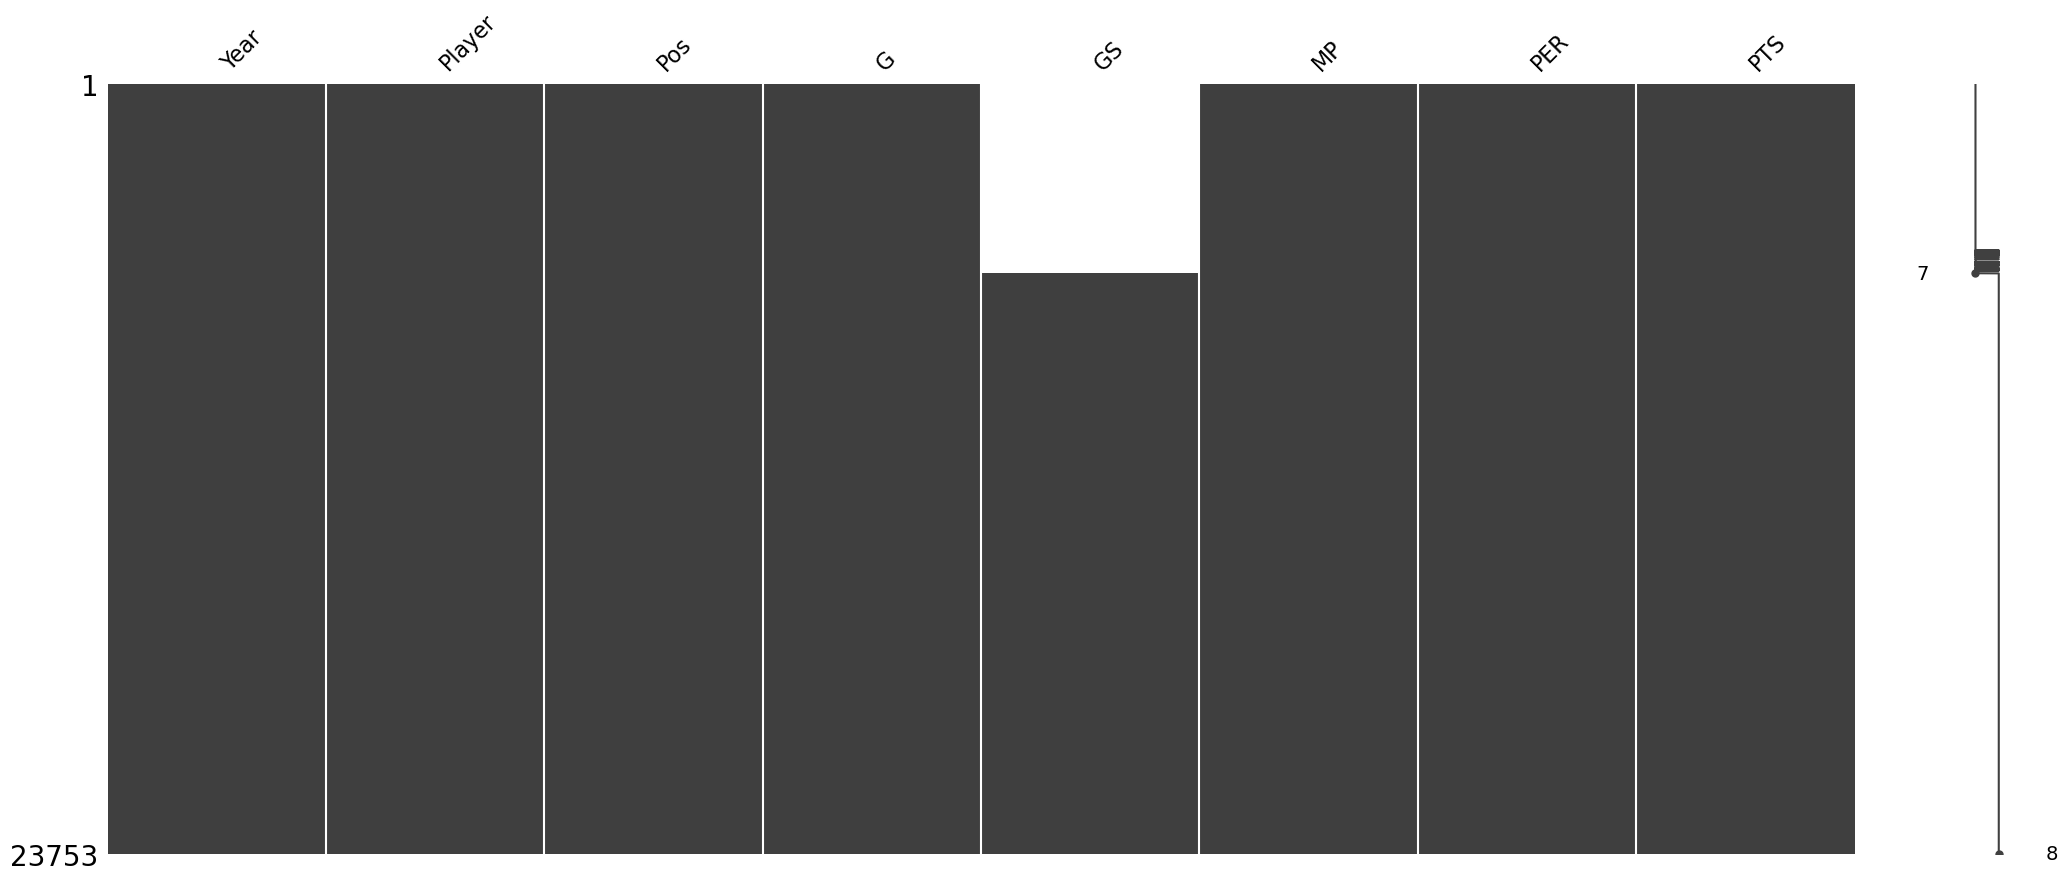

In [65]:
msno.matrix(df_limpieza)

### For the above reason, it is decided to eliminate ALL the NaN that exist from the 'GS' variable, since there is no viable way to fill in these data with some statistical method (mean, median, etc) or interpolate since there is no coherent trend. or the chances that the data is not correct for the player are too high in my opinion (assuming you insert '0' the player may have been extraordinarily good, assuming you insert 'average' the player may have been extraordinarily bad, for either of the 2 cases, you are harming, from intermediate to severe, the analysis, and therefore, the results).

In [66]:
df_limpieza.dropna(subset = ['GS'], inplace = True)
df_limpieza

,Year,Player,Pos,G,GS,MP,PER,PTS
5730,1980.0,Tiny Archibald*,PG,80.0,80.0,2864.0,15.3,1131.0
5748,1980.0,Larry Bird*,PF,82.0,82.0,2955.0,20.5,1745.0
5781,1980.0,M.L. Carr,SF,82.0,7.0,1994.0,14.6,914.0
5786,1980.0,Don Chaney,SG,60.0,0.0,523.0,7.8,167.0
5802,1980.0,Dave Cowens*,C,66.0,55.0,2159.0,14.8,940.0
...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,62.0,58.0,1725.0,16.7,639.0
24687,2017.0,Tyler Zeller,C,51.0,5.0,525.0,13.0,178.0
24688,2017.0,Stephen Zimmerman,C,19.0,0.0,108.0,7.3,23.0
24689,2017.0,Paul Zipser,SF,44.0,18.0,843.0,6.9,240.0


### Since GS was the only variable with missing data, an analysis is done again to see how the Data Set now turned out.

In [67]:
df_limpieza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17938 entries, 5730 to 24690
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    17938 non-null  float64
 1   Player  17938 non-null  object 
 2   Pos     17938 non-null  object 
 3   G       17938 non-null  float64
 4   GS      17938 non-null  float64
 5   MP      17938 non-null  float64
 6   PER     17938 non-null  float64
 7   PTS     17938 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.2+ MB


In [68]:
df_limpieza.isna().sum()

Year      0
Player    0
Pos       0
G         0
GS        0
MP        0
PER       0
PTS       0
dtype: int64

In [69]:
df_limpieza.isna().sum()/fil*100

Year      0.0
Player    0.0
Pos       0.0
G         0.0
GS        0.0
MP        0.0
PER       0.0
PTS       0.0
dtype: float64

<AxesSubplot:>

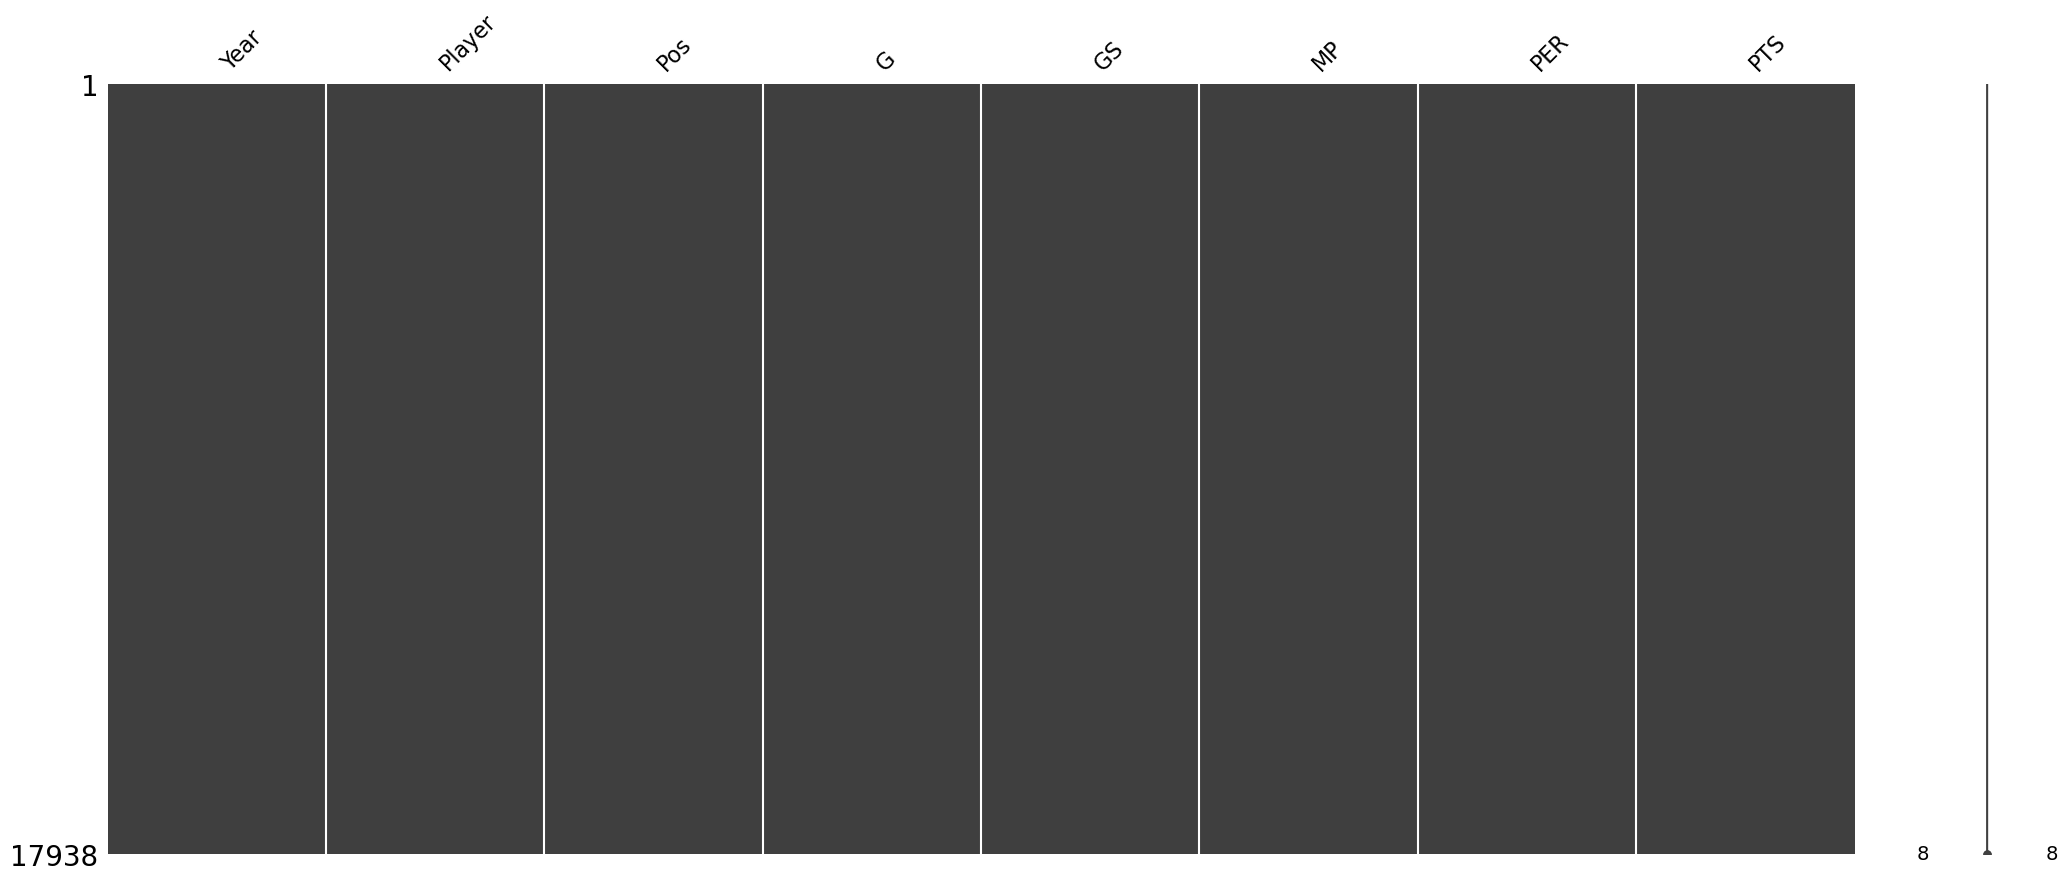

In [70]:
msno.matrix(df_limpieza)

### The name of a player that had an asterisk * at the end was modified, that character was removed.

In [71]:
lista_jugador = df_limpieza[df_limpieza ['Player'] == 'Tiny Archibald*'].index.tolist()
lista_jugador

[5730, 6091, 6453, 6832, 7221]

In [72]:
df_limpieza ['Player'][lista_jugador] = 'Tiny Archibald'
df_limpieza[df_limpieza['Player'] == 'Tiny Archibald']

,Year,Player,Pos,G,GS,MP,PER,PTS
5730,1980.0,Tiny Archibald,PG,80.0,80.0,2864.0,15.3,1131.0
6091,1981.0,Tiny Archibald,PG,80.0,72.0,2820.0,14.3,1106.0
6453,1982.0,Tiny Archibald,PG,68.0,51.0,2167.0,14.3,858.0
6832,1983.0,Tiny Archibald,PG,66.0,19.0,1811.0,12.3,695.0
7221,1984.0,Tiny Archibald,PG,46.0,46.0,1038.0,10.6,340.0


In [73]:
df_limpieza[df_limpieza['Player'] == 'Tiny Archibald'].shape[0]

5

In [74]:
df_limpieza['Player'].value_counts()['Tiny Archibald']

5

### We check for the last time that there is no missing data (NaN)

In [75]:
df_limpieza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17938 entries, 5730 to 24690
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    17938 non-null  float64
 1   Player  17938 non-null  object 
 2   Pos     17938 non-null  object 
 3   G       17938 non-null  float64
 4   GS      17938 non-null  float64
 5   MP      17938 non-null  float64
 6   PER     17938 non-null  float64
 7   PTS     17938 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.7+ MB


In [76]:
df_limpieza.isna().sum()

Year      0
Player    0
Pos       0
G         0
GS        0
MP        0
PER       0
PTS       0
dtype: int64

<AxesSubplot:>

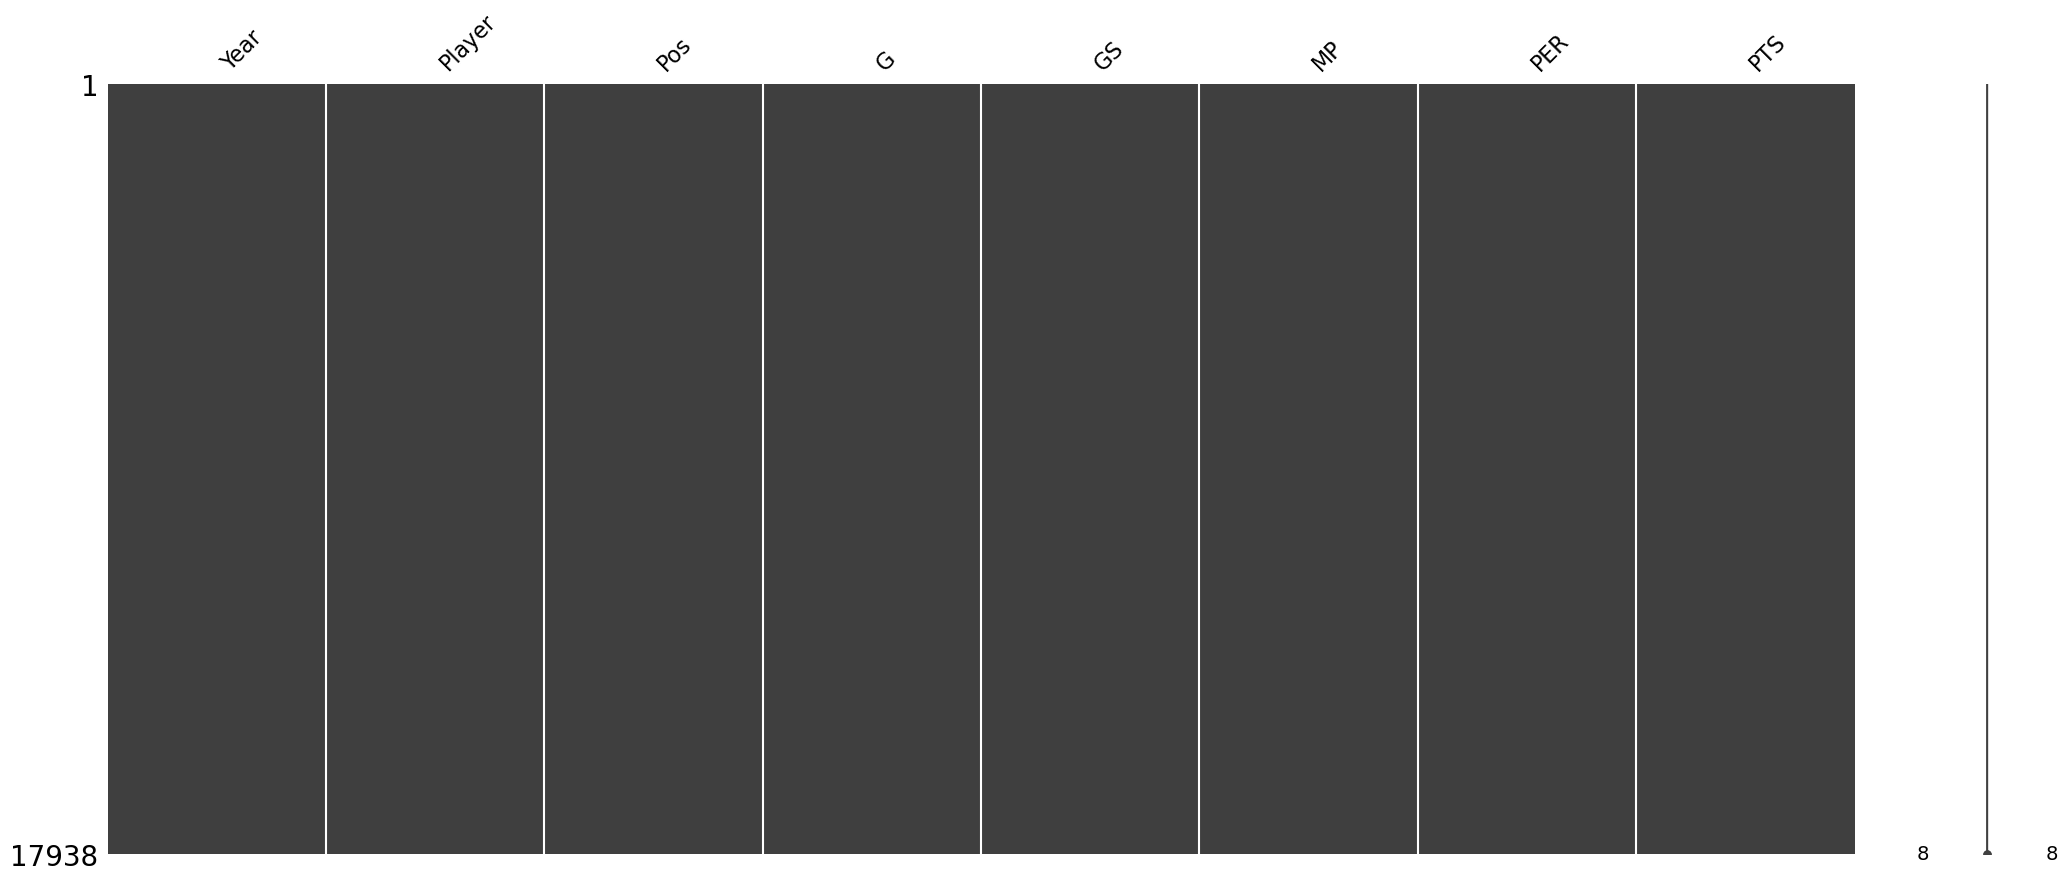

In [77]:
msno.matrix(df_limpieza)

# 4.- MERGE WITH THE OTHER DATASET (SALARIES)

### Let's read the other dataset and see what it contains

In [78]:
df_salaries = pd.read_csv('Salaries1.csv')

In [79]:
df_salaries

,RK,NAME,TEAM,SALARY,Team Rank
0,1,LeBron James,CLE,30963450.0,1
1,2,Al Horford,BOS,26540100.0,1
2,3,Kevin Durant,GSW,26540100.0,1
3,4,James Harden,HOU,26540100.0,1
4,5,Mike Conley,MEM,26540100.0,1
...,...,...,...,...,...
481,482,Marcus Georges-Hunt,ORL,31969.0,17
482,483,Elijah Millsap,PHO,23069.0,18
483,484,Quinn Cook,NOP,15984.0,20
484,485,Axel Toupane,NOP,15435.0,21


### First of all, to be able to do the merge with the previous data set, we need to change the column with which both Data Frames are going to be merged, in this case it would be 'NAME' for 'Player' and we verify it.

In [81]:
df_salaries = df_salaries.rename(columns = {'NAME' : 'Player'})
df_salaries

,RK,Player,TEAM,SALARY,Team Rank
0,1,LeBron James,CLE,30963450.0,1
1,2,Al Horford,BOS,26540100.0,1
2,3,Kevin Durant,GSW,26540100.0,1
3,4,James Harden,HOU,26540100.0,1
4,5,Mike Conley,MEM,26540100.0,1
...,...,...,...,...,...
481,482,Marcus Georges-Hunt,ORL,31969.0,17
482,483,Elijah Millsap,PHO,23069.0,18
483,484,Quinn Cook,NOP,15984.0,20
484,485,Axel Toupane,NOP,15435.0,21


### The merge is made.

In [82]:
df_merged = df_limpieza.merge(df_salaries, on = ['Player'], how = 'left')
df_merged

,Year,Player,Pos,G,GS,MP,PER,PTS,RK,TEAM,SALARY,Team Rank
0,1980.0,Tiny Archibald,PG,80.0,80.0,2864.0,15.3,1131.0,NaN,NaN,NaN,NaN
1,1980.0,Larry Bird*,PF,82.0,82.0,2955.0,20.5,1745.0,NaN,NaN,NaN,NaN
2,1980.0,M.L. Carr,SF,82.0,7.0,1994.0,14.6,914.0,NaN,NaN,NaN,NaN
3,1980.0,Don Chaney,SG,60.0,0.0,523.0,7.8,167.0,NaN,NaN,NaN,NaN
4,1980.0,Dave Cowens*,C,66.0,55.0,2159.0,14.8,940.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
17933,2017.0,Cody Zeller,PF,62.0,58.0,1725.0,16.7,639.0,176.0,CHO,5318313.0,9.0
17934,2017.0,Tyler Zeller,C,51.0,5.0,525.0,13.0,178.0,124.0,BOS,8000000.0,4.0
17935,2017.0,Stephen Zimmerman,C,19.0,0.0,108.0,7.3,23.0,391.0,ORL,950000.0,15.0
17936,2017.0,Paul Zipser,SF,44.0,18.0,843.0,6.9,240.0,410.0,CHI,750000.0,15.0


### The columns are observed and an error is found which will bring us more problems later (the 'SALARY' column has too many spaces), so it is corrected.

In [83]:
df_merged.columns

Index(['Year', 'Player', 'Pos', 'G', 'GS', 'MP', 'PER', 'PTS', 'RK', 'TEAM',
       'SALARY         ', 'Team Rank'],
      dtype='object')

In [84]:
df_merged = df_merged.rename(columns = {'SALARY         ' : 'Salary'})
df_merged

,Year,Player,Pos,G,GS,MP,PER,PTS,RK,TEAM,Salary,Team Rank
0,1980.0,Tiny Archibald,PG,80.0,80.0,2864.0,15.3,1131.0,NaN,NaN,NaN,NaN
1,1980.0,Larry Bird*,PF,82.0,82.0,2955.0,20.5,1745.0,NaN,NaN,NaN,NaN
2,1980.0,M.L. Carr,SF,82.0,7.0,1994.0,14.6,914.0,NaN,NaN,NaN,NaN
3,1980.0,Don Chaney,SG,60.0,0.0,523.0,7.8,167.0,NaN,NaN,NaN,NaN
4,1980.0,Dave Cowens*,C,66.0,55.0,2159.0,14.8,940.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
17933,2017.0,Cody Zeller,PF,62.0,58.0,1725.0,16.7,639.0,176.0,CHO,5318313.0,9.0
17934,2017.0,Tyler Zeller,C,51.0,5.0,525.0,13.0,178.0,124.0,BOS,8000000.0,4.0
17935,2017.0,Stephen Zimmerman,C,19.0,0.0,108.0,7.3,23.0,391.0,ORL,950000.0,15.0
17936,2017.0,Paul Zipser,SF,44.0,18.0,843.0,6.9,240.0,410.0,CHI,750000.0,15.0


### The columns are observed again to eliminate those that do not interest us and it is verified.

In [85]:
df_merged.columns

Index(['Year', 'Player', 'Pos', 'G', 'GS', 'MP', 'PER', 'PTS', 'RK', 'TEAM',
       'Salary', 'Team Rank'],
      dtype='object')

In [86]:
df_merged = df_merged.drop(columns = (['RK', 'TEAM', 'Team Rank']))
df_merged

,Year,Player,Pos,G,GS,MP,PER,PTS,Salary
0,1980.0,Tiny Archibald,PG,80.0,80.0,2864.0,15.3,1131.0,NaN
1,1980.0,Larry Bird*,PF,82.0,82.0,2955.0,20.5,1745.0,NaN
2,1980.0,M.L. Carr,SF,82.0,7.0,1994.0,14.6,914.0,NaN
3,1980.0,Don Chaney,SG,60.0,0.0,523.0,7.8,167.0,NaN
4,1980.0,Dave Cowens*,C,66.0,55.0,2159.0,14.8,940.0,NaN
...,...,...,...,...,...,...,...,...,...
17933,2017.0,Cody Zeller,PF,62.0,58.0,1725.0,16.7,639.0,5318313.0
17934,2017.0,Tyler Zeller,C,51.0,5.0,525.0,13.0,178.0,8000000.0
17935,2017.0,Stephen Zimmerman,C,19.0,0.0,108.0,7.3,23.0,950000.0
17936,2017.0,Paul Zipser,SF,44.0,18.0,843.0,6.9,240.0,750000.0


### All the missing records are removed from the 'Salary' variable and it is verified how many records we have left at the end.

In [87]:
df_merged_not_nan = df_merged.dropna(subset = ['Salary'])
df_merged_not_nan

,Year,Player,Pos,G,GS,MP,PER,PTS,Salary
7,1980.0,Gerald Henderson,PG,76.0,2.0,1061.0,12.7,473.0,9000000.0
20,1981.0,Gerald Henderson,PG,82.0,10.0,1608.0,10.4,636.0,9000000.0
114,1982.0,Mike Dunleavy,SG,70.0,15.0,1315.0,13.2,520.0,4837500.0
158,1982.0,Gerald Henderson,PG,82.0,31.0,1844.0,13.2,833.0,9000000.0
241,1982.0,John Lucas,PG,79.0,53.0,1940.0,15.2,666.0,980431.0
...,...,...,...,...,...,...,...,...,...
17933,2017.0,Cody Zeller,PF,62.0,58.0,1725.0,16.7,639.0,5318313.0
17934,2017.0,Tyler Zeller,C,51.0,5.0,525.0,13.0,178.0,8000000.0
17935,2017.0,Stephen Zimmerman,C,19.0,0.0,108.0,7.3,23.0,950000.0
17936,2017.0,Paul Zipser,SF,44.0,18.0,843.0,6.9,240.0,750000.0


### It is verified that the Data Frame is free of missing records (NaN) in order to proceed with the PCA.

In [88]:
df_merged_not_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3319 entries, 7 to 17937
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    3319 non-null   float64
 1   Player  3319 non-null   object 
 2   Pos     3319 non-null   object 
 3   G       3319 non-null   float64
 4   GS      3319 non-null   float64
 5   MP      3319 non-null   float64
 6   PER     3319 non-null   float64
 7   PTS     3319 non-null   float64
 8   Salary  3319 non-null   float64
dtypes: float64(7), object(2)
memory usage: 259.3+ KB


In [89]:
df_merged_not_nan.isna().sum()

Year      0
Player    0
Pos       0
G         0
GS        0
MP        0
PER       0
PTS       0
Salary    0
dtype: int64

<AxesSubplot:>

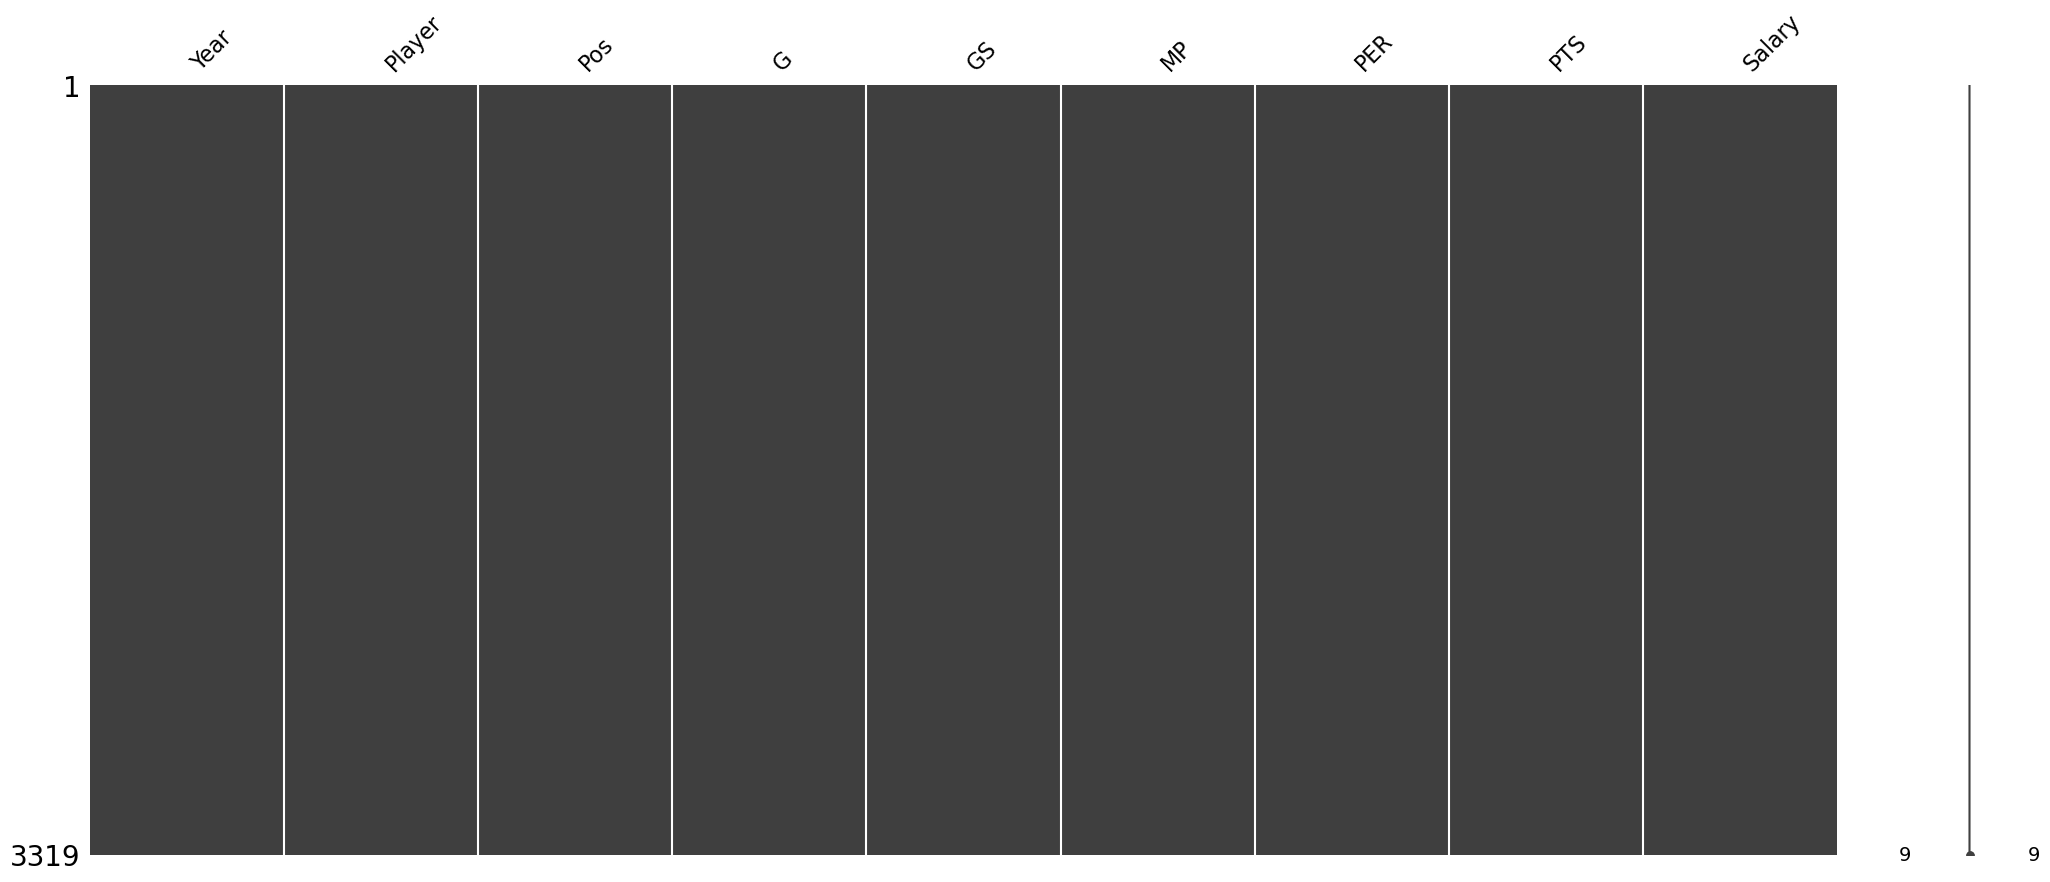

In [90]:
msno.matrix(df_merged_not_nan)

# 5.- LABEL ENCODING

In [91]:
from sklearn import preprocessing

In [92]:
df_encoding = df_merged_not_nan
df_encoding

,Year,Player,Pos,G,GS,MP,PER,PTS,Salary
7,1980.0,Gerald Henderson,PG,76.0,2.0,1061.0,12.7,473.0,9000000.0
20,1981.0,Gerald Henderson,PG,82.0,10.0,1608.0,10.4,636.0,9000000.0
114,1982.0,Mike Dunleavy,SG,70.0,15.0,1315.0,13.2,520.0,4837500.0
158,1982.0,Gerald Henderson,PG,82.0,31.0,1844.0,13.2,833.0,9000000.0
241,1982.0,John Lucas,PG,79.0,53.0,1940.0,15.2,666.0,980431.0
...,...,...,...,...,...,...,...,...,...
17933,2017.0,Cody Zeller,PF,62.0,58.0,1725.0,16.7,639.0,5318313.0
17934,2017.0,Tyler Zeller,C,51.0,5.0,525.0,13.0,178.0,8000000.0
17935,2017.0,Stephen Zimmerman,C,19.0,0.0,108.0,7.3,23.0,950000.0
17936,2017.0,Paul Zipser,SF,44.0,18.0,843.0,6.9,240.0,750000.0


### Now we are going to do a label encoding with the variable 'Pos'.

In [93]:
# define and fit LabelEncoder
print(df_encoding.columns.to_list())

le = preprocessing.LabelEncoder()
le.fit(df_encoding['Pos'])

df_encoding['Pos_labeled_sklearn'] = le.transform(df_encoding['Pos'])

display(df_encoding[['Pos','Pos_labeled_sklearn']])

['Year', 'Player', 'Pos', 'G', 'GS', 'MP', 'PER', 'PTS', 'Salary']


,Pos,Pos_labeled_sklearn
7,PG,5
20,PG,5
114,SG,10
158,PG,5
241,PG,5
...,...,...
17933,PF,2
17934,C,0
17935,C,0
17936,SF,7


### We group together to see how scikit learn ranked the positions.

In [94]:
df_encoding[['Pos','Pos_labeled_sklearn']].groupby('Pos_labeled_sklearn').value_counts()

Pos_labeled_sklearn  Pos  
0                    C        545
1                    C-PF       1
2                    PF       657
3                    PF-C       4
4                    PF-SF      6
5                    PG       735
6                    PG-SG      6
7                    SF       628
8                    SF-PF      4
9                    SF-SG      3
10                   SG       722
11                   SG-PF      2
12                   SG-PG      5
13                   SG-SF      1
dtype: int64

### Finally we see how the Dataframe was at the end.

In [95]:
df_encoding

,Year,Player,Pos,G,GS,MP,PER,PTS,Salary,Pos_labeled_sklearn
7,1980.0,Gerald Henderson,PG,76.0,2.0,1061.0,12.7,473.0,9000000.0,5
20,1981.0,Gerald Henderson,PG,82.0,10.0,1608.0,10.4,636.0,9000000.0,5
114,1982.0,Mike Dunleavy,SG,70.0,15.0,1315.0,13.2,520.0,4837500.0,10
158,1982.0,Gerald Henderson,PG,82.0,31.0,1844.0,13.2,833.0,9000000.0,5
241,1982.0,John Lucas,PG,79.0,53.0,1940.0,15.2,666.0,980431.0,5
...,...,...,...,...,...,...,...,...,...,...
17933,2017.0,Cody Zeller,PF,62.0,58.0,1725.0,16.7,639.0,5318313.0,2
17934,2017.0,Tyler Zeller,C,51.0,5.0,525.0,13.0,178.0,8000000.0,0
17935,2017.0,Stephen Zimmerman,C,19.0,0.0,108.0,7.3,23.0,950000.0,0
17936,2017.0,Paul Zipser,SF,44.0,18.0,843.0,6.9,240.0,750000.0,7


# 6.- SUMMARY AND IMPROVEMENTS OR CHANGES

### We start by seeing how the data was already with the previous cleaning, encoding and merge.

In [96]:
import seaborn as sns
sns.set()

In [97]:
df_resumen = df_encoding.drop_duplicates()
df_resumen

,Year,Player,Pos,G,GS,MP,PER,PTS,Salary,Pos_labeled_sklearn
7,1980.0,Gerald Henderson,PG,76.0,2.0,1061.0,12.7,473.0,9000000.0,5
20,1981.0,Gerald Henderson,PG,82.0,10.0,1608.0,10.4,636.0,9000000.0,5
114,1982.0,Mike Dunleavy,SG,70.0,15.0,1315.0,13.2,520.0,4837500.0,10
158,1982.0,Gerald Henderson,PG,82.0,31.0,1844.0,13.2,833.0,9000000.0,5
241,1982.0,John Lucas,PG,79.0,53.0,1940.0,15.2,666.0,980431.0,5
...,...,...,...,...,...,...,...,...,...,...
17933,2017.0,Cody Zeller,PF,62.0,58.0,1725.0,16.7,639.0,5318313.0,2
17934,2017.0,Tyler Zeller,C,51.0,5.0,525.0,13.0,178.0,8000000.0,0
17935,2017.0,Stephen Zimmerman,C,19.0,0.0,108.0,7.3,23.0,950000.0,0
17936,2017.0,Paul Zipser,SF,44.0,18.0,843.0,6.9,240.0,750000.0,7


In [98]:
df_resumen.describe()

,Year,G,GS,MP,PER,PTS,Salary,Pos_labeled_sklearn
count,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3.319000e+03,3319.000000
mean,2012.511299,56.473034,30.280205,1425.525459,14.309009,623.207593,7.269258e+06,5.071407
std,5.171656,23.289561,29.765840,871.088907,4.678678,481.148252,6.802332e+06,3.497699
min,1980.000000,1.000000,0.000000,1.000000,-5.300000,0.000000,5.767000e+03,0.000000
25%,2011.000000,40.000000,2.000000,663.500000,11.400000,228.500000,1.403611e+06,2.000000
50%,2014.000000,64.000000,19.000000,1427.000000,14.200000,530.000000,5.000000e+06,5.000000
75%,2016.000000,76.500000,60.000000,2133.500000,17.100000,913.500000,1.124122e+07,7.000000
max,2017.000000,83.000000,82.000000,3388.000000,30.400000,2593.000000,3.096345e+07,13.000000


In [99]:
df_resumen['Pos'].value_counts()

PG       735
SG       722
PF       657
SF       628
C        545
PF-SF      6
PG-SG      6
SG-PG      5
PF-C       4
SF-PF      4
SF-SG      3
SG-PF      2
C-PF       1
SG-SF      1
Name: Pos, dtype: int64

In [100]:
df_resumen[['Pos','Pos_labeled_sklearn']].groupby('Pos_labeled_sklearn').value_counts()

Pos_labeled_sklearn  Pos  
0                    C        545
1                    C-PF       1
2                    PF       657
3                    PF-C       4
4                    PF-SF      6
5                    PG       735
6                    PG-SG      6
7                    SF       628
8                    SF-PF      4
9                    SF-SG      3
10                   SG       722
11                   SG-PF      2
12                   SG-PG      5
13                   SG-SF      1
dtype: int64

### Very important, check AGAIN that there is no missing data (NaN), since the PCA technique is sensitive to it.

In [101]:
df_resumen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3319 entries, 7 to 17937
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3319 non-null   float64
 1   Player               3319 non-null   object 
 2   Pos                  3319 non-null   object 
 3   G                    3319 non-null   float64
 4   GS                   3319 non-null   float64
 5   MP                   3319 non-null   float64
 6   PER                  3319 non-null   float64
 7   PTS                  3319 non-null   float64
 8   Salary               3319 non-null   float64
 9   Pos_labeled_sklearn  3319 non-null   int32  
dtypes: float64(7), int32(1), object(2)
memory usage: 272.3+ KB


In [102]:
df_resumen.isna().sum()

Year                   0
Player                 0
Pos                    0
G                      0
GS                     0
MP                     0
PER                    0
PTS                    0
Salary                 0
Pos_labeled_sklearn    0
dtype: int64

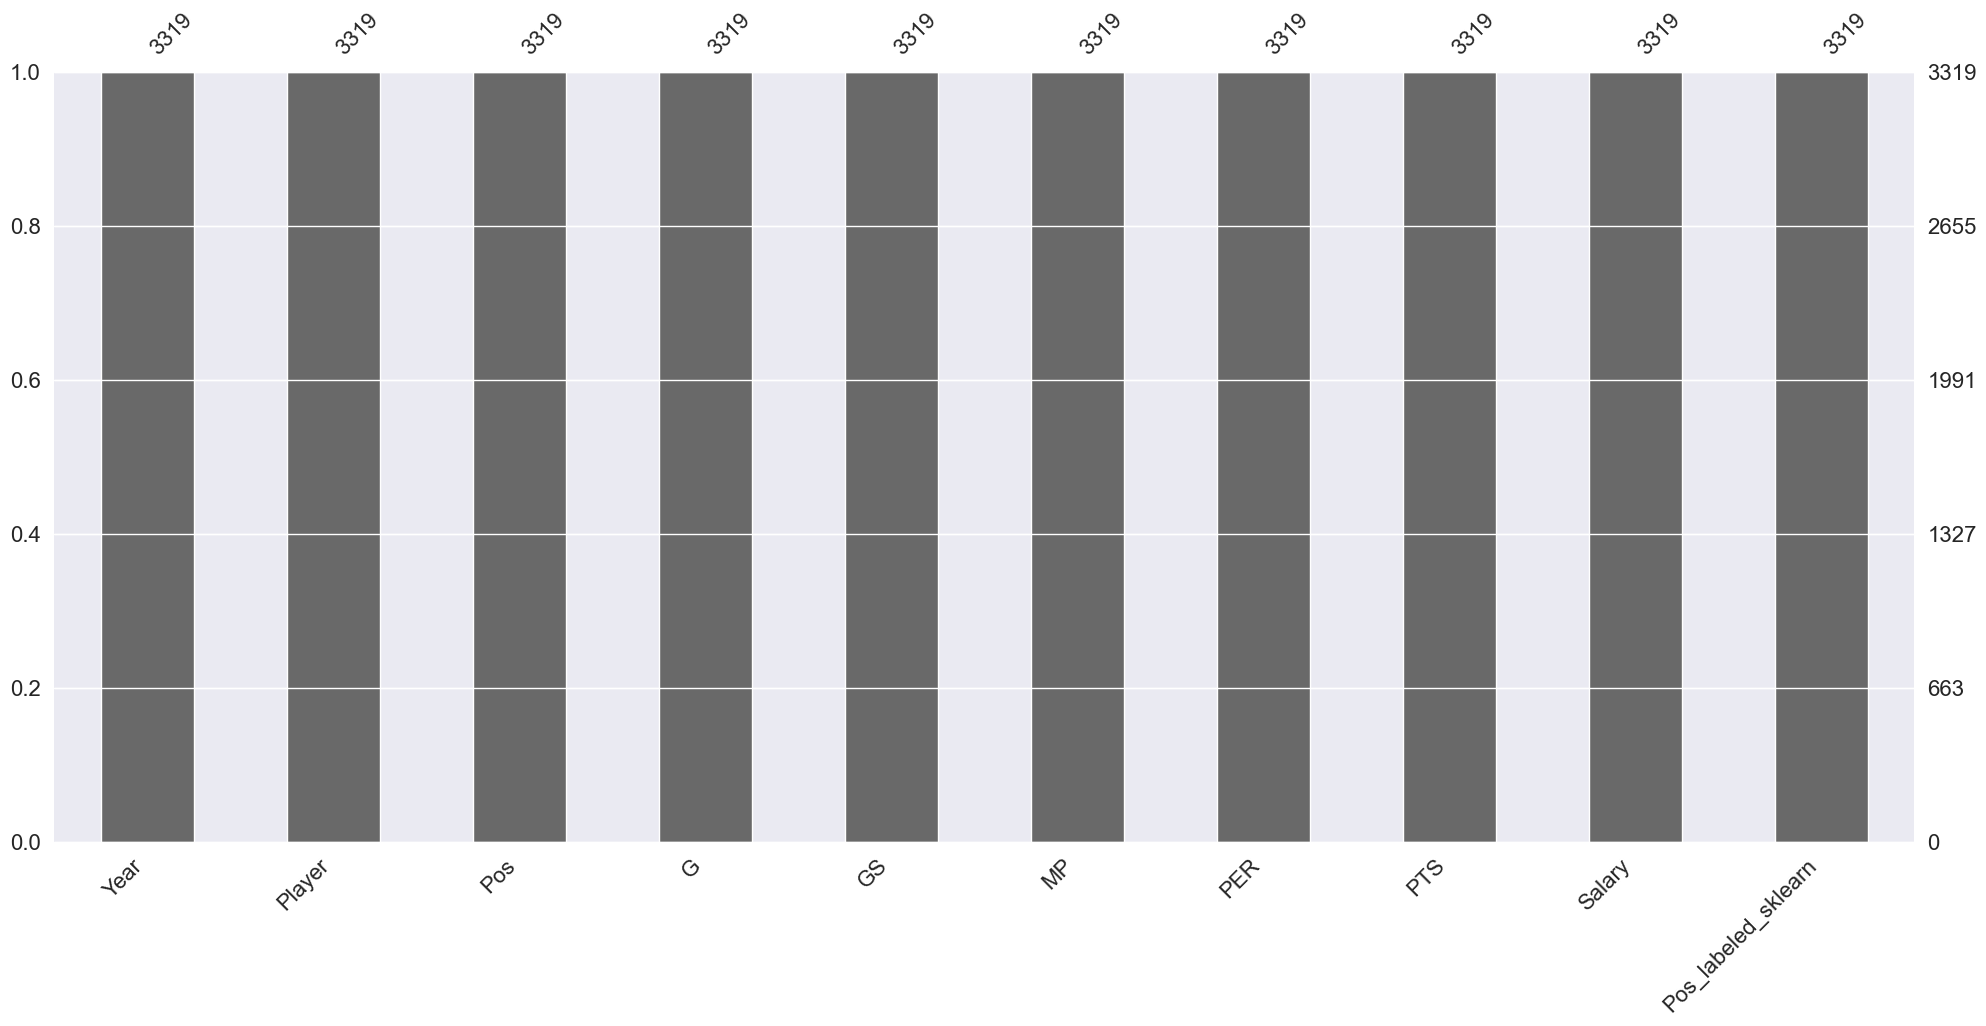

In [103]:
#msno.matrix(df_standardized)
p=msno.bar(df_resumen)

### Since the analysis, the graphs and the PCA will become heavier with 10 variables, I am going to have to eliminate some columns (observe the ones that have a correlation and that give me less information, those that are categorical due to standardization, among others).

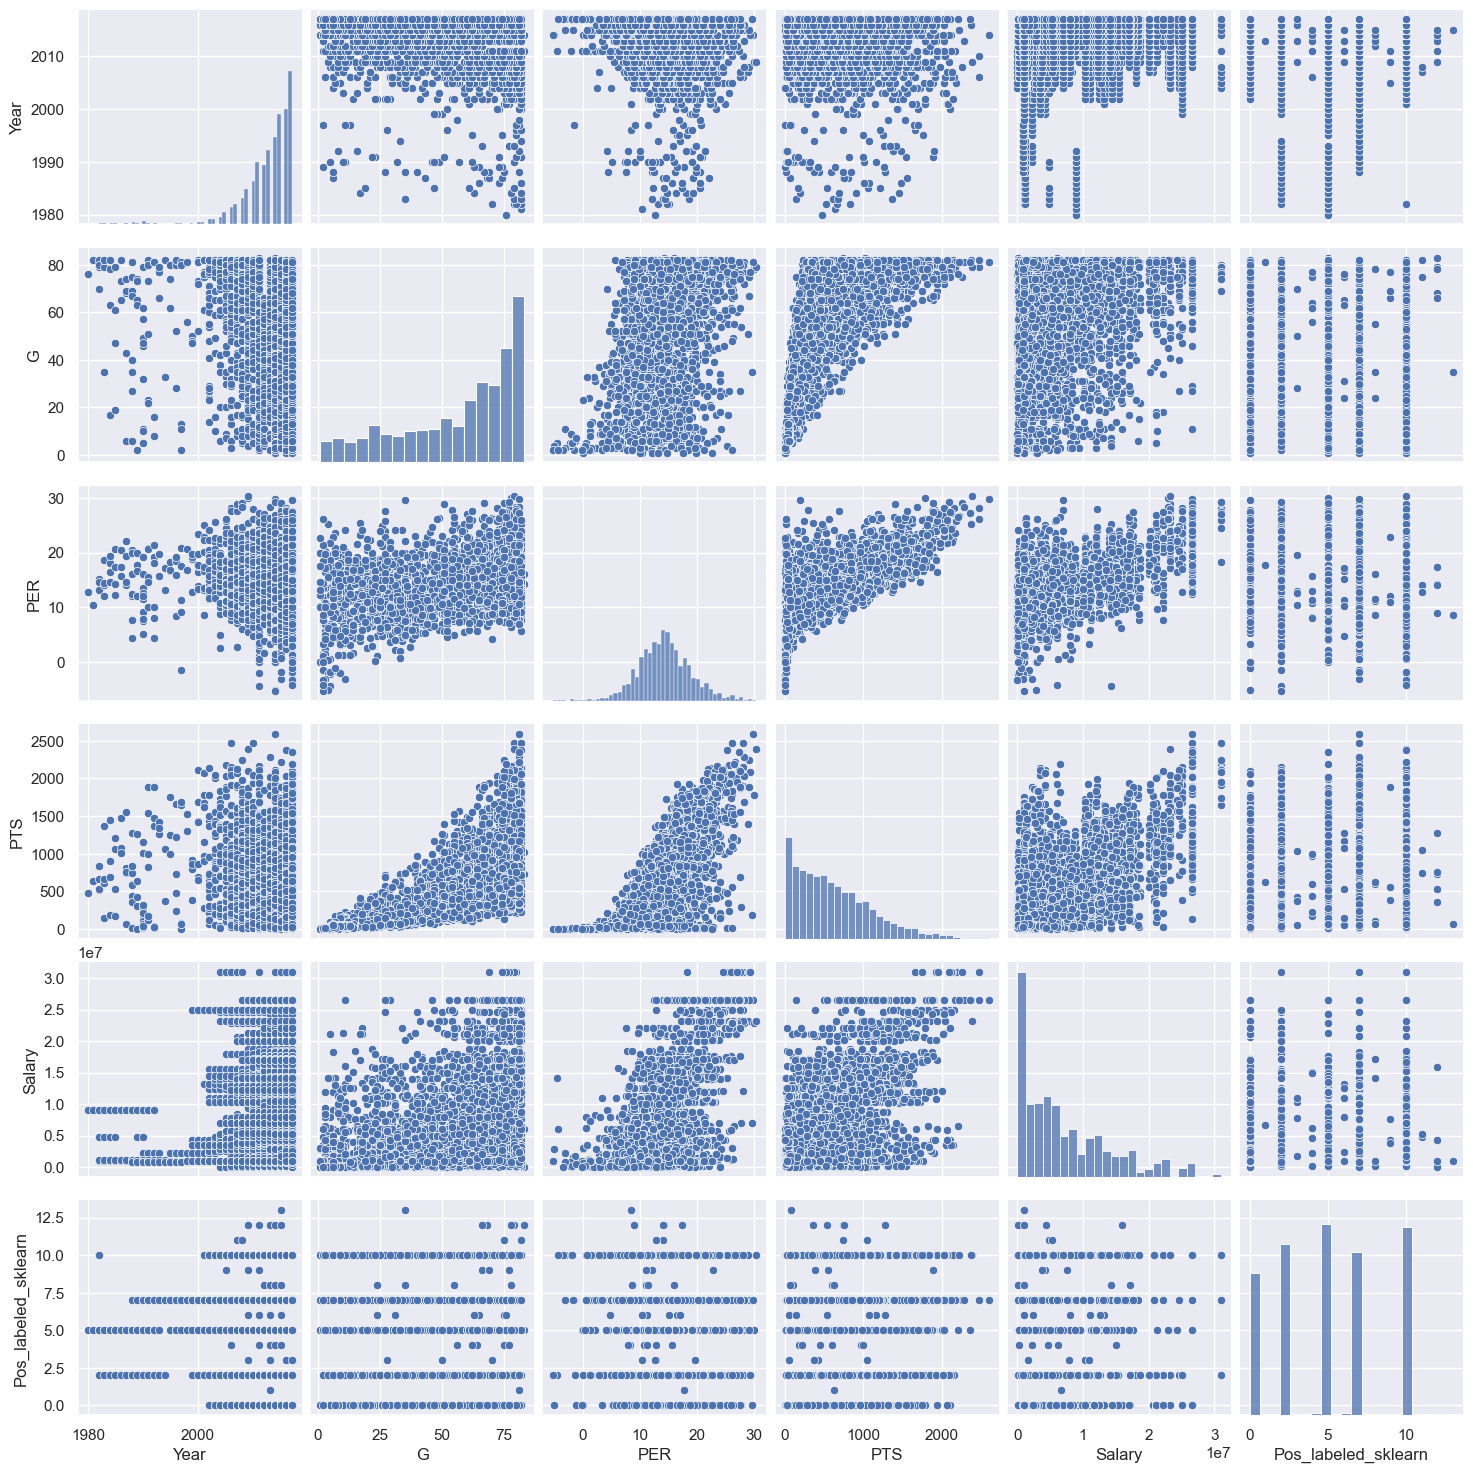

In [104]:
sns.set()
cols = ['Year','G','PER','PTS','Salary','Pos_labeled_sklearn']
sns.pairplot(df_resumen[cols], size = 2.5)
plt.show();

### Looking at the graph above it can be seen that there seems to be a correlation between PTS and G and also PER, let's take a closer look.

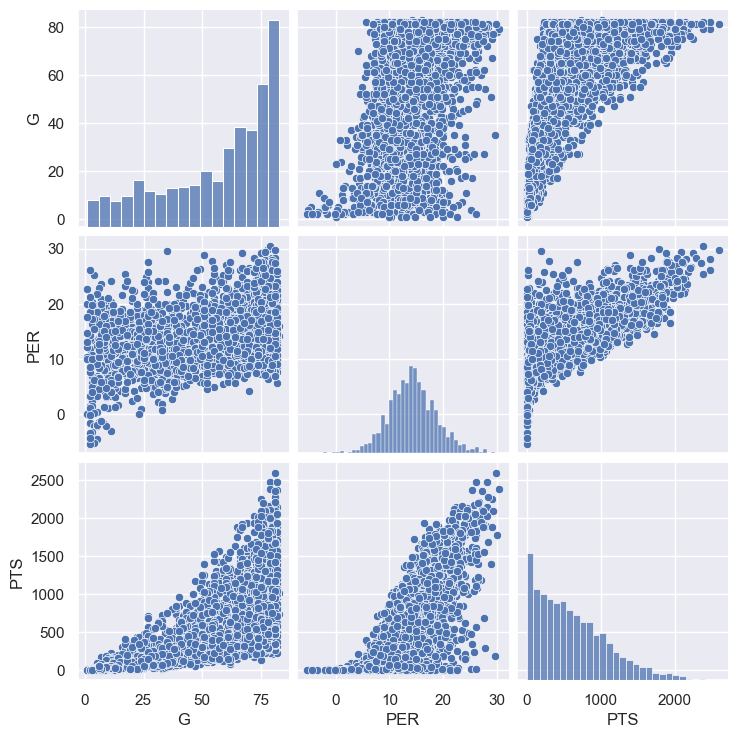

In [105]:
sns.set()
cols = ['G','PER','PTS']
sns.pairplot(df_resumen[cols], size = 2.5)
plt.show();

### According to the previous analysis, I will remove PTS. Along with 'Player', 'Pos_labeled_sklearn', 'GS' and 'MP'
### So we only have 'Year','Pos','G','PER' and 'Salary'

In [106]:
df_resumen = df_resumen.drop(columns = (['Player', 'GS','MP','PTS','Pos_labeled_sklearn']))
df_resumen

,Year,Pos,G,PER,Salary
7,1980.0,PG,76.0,12.7,9000000.0
20,1981.0,PG,82.0,10.4,9000000.0
114,1982.0,SG,70.0,13.2,4837500.0
158,1982.0,PG,82.0,13.2,9000000.0
241,1982.0,PG,79.0,15.2,980431.0
...,...,...,...,...,...
17933,2017.0,PF,62.0,16.7,5318313.0
17934,2017.0,C,51.0,13.0,8000000.0
17935,2017.0,C,19.0,7.3,950000.0
17936,2017.0,SF,44.0,6.9,750000.0


### For the next step (PCA) the categorical variable to use is going to be 'Pos' so I want to see how many UNIQUE positions there are and how they are distributed.

In [107]:
df_resumen['Pos'].value_counts()

PG       735
SG       722
PF       657
SF       628
C        545
PF-SF      6
PG-SG      6
SG-PG      5
PF-C       4
SF-PF      4
SF-SG      3
SG-PF      2
C-PF       1
SG-SF      1
Name: Pos, dtype: int64

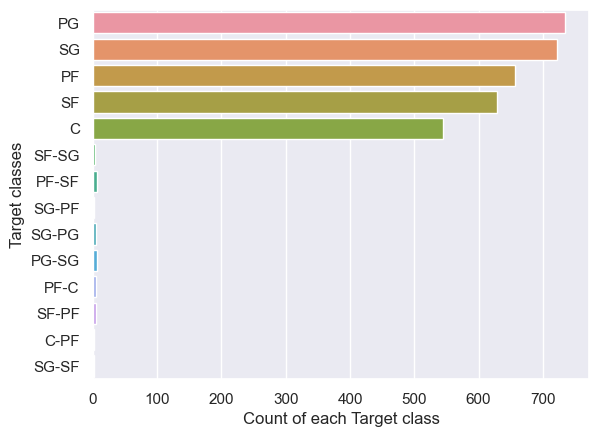

In [108]:
sns.countplot(y=df_resumen.Pos ,data=df_resumen)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

# 7.- APPLYING PCA TO DATA SET

In [109]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import os

### To begin we will see that everything is in order, for this PCA 'Pos' will be chosen as the main or categorical variable and from there reduce the dimensions with the PCA to see which variables contribute more to this same variable according to the Scikit Learn library and do the analysis. 'Pos' has 14 different positions.

In [110]:
df_resumen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3319 entries, 7 to 17937
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    3319 non-null   float64
 1   Pos     3319 non-null   object 
 2   G       3319 non-null   float64
 3   PER     3319 non-null   float64
 4   Salary  3319 non-null   float64
dtypes: float64(4), object(1)
memory usage: 284.6+ KB


### Let's reset the index because if it is not done it will cause problems in the future.

In [111]:
df_resumen.reset_index(inplace=True)
df_resumen

,index,Year,Pos,G,PER,Salary
0,7,1980.0,PG,76.0,12.7,9000000.0
1,20,1981.0,PG,82.0,10.4,9000000.0
2,114,1982.0,SG,70.0,13.2,4837500.0
3,158,1982.0,PG,82.0,13.2,9000000.0
4,241,1982.0,PG,79.0,15.2,980431.0
...,...,...,...,...,...,...
3314,17933,2017.0,PF,62.0,16.7,5318313.0
3315,17934,2017.0,C,51.0,13.0,8000000.0
3316,17935,2017.0,C,19.0,7.3,950000.0
3317,17936,2017.0,SF,44.0,6.9,750000.0


### The column created in the previous step 'Index' is eliminated because it is not useful for us and since it is a numerical data, the PCA will include it and the data will be wrong.

In [112]:
df_resumen = df_resumen.drop(columns = (['index']))
df_resumen

,Year,Pos,G,PER,Salary
0,1980.0,PG,76.0,12.7,9000000.0
1,1981.0,PG,82.0,10.4,9000000.0
2,1982.0,SG,70.0,13.2,4837500.0
3,1982.0,PG,82.0,13.2,9000000.0
4,1982.0,PG,79.0,15.2,980431.0
...,...,...,...,...,...
3314,2017.0,PF,62.0,16.7,5318313.0
3315,2017.0,C,51.0,13.0,8000000.0
3316,2017.0,C,19.0,7.3,950000.0
3317,2017.0,SF,44.0,6.9,750000.0


### The DataFrame is divided to leave the numerical variables that will enter the PCA and the categorical variable 'Pos'

In [113]:
X = df_resumen.drop(['Pos'],axis=1)
y = df_resumen['Pos']
X

,Year,G,PER,Salary
0,1980.0,76.0,12.7,9000000.0
1,1981.0,82.0,10.4,9000000.0
2,1982.0,70.0,13.2,4837500.0
3,1982.0,82.0,13.2,9000000.0
4,1982.0,79.0,15.2,980431.0
...,...,...,...,...
3314,2017.0,62.0,16.7,5318313.0
3315,2017.0,51.0,13.0,8000000.0
3316,2017.0,19.0,7.3,950000.0
3317,2017.0,44.0,6.9,750000.0


### We standardize, very important to do so!

In [114]:
X = StandardScaler().fit_transform(X)
X
#scaler = MinMaxScaler()
#X=scaler.fit_transform(X)
#X

array([[-6.28738553,  0.83856919, -0.34395428,  0.25447204],
       [-6.09399475,  1.09623416, -0.83562025,  0.25447204],
       [-5.90060396,  0.58090421, -0.23707037, -0.3575427 ],
       ...,
       [ 0.86807349, -1.60924804, -1.49830047, -0.92912404],
       [ 0.86807349, -0.53564399, -1.58380759, -0.95853016],
       [ 0.86807349, -0.79330896,  0.57524732, -0.91663291]])

### Once standardized, we join the numerical variables with the chosen category ('Pos')

In [115]:
df_pca_inicial = pd.DataFrame(X)
df_pca_inicial['Pos']= y
df_pca_inicial

,0,1,2,3,Pos
0,-6.287386,0.838569,-0.343954,0.254472,PG
1,-6.093995,1.096234,-0.835620,0.254472,PG
2,-5.900604,0.580904,-0.237070,-0.357543,SG
3,-5.900604,1.096234,-0.237070,0.254472,PG
4,-5.900604,0.967402,0.190465,-0.924650,PG
...,...,...,...,...,...
3314,0.868073,0.237351,0.511117,-0.286848,PF
3315,0.868073,-0.235035,-0.279824,0.107441,C
3316,0.868073,-1.609248,-1.498300,-0.929124,C
3317,0.868073,-0.535644,-1.583808,-0.958530,SF


### We verify that there is no missing data.

In [116]:
df_pca_inicial.isna().sum()

0      0
1      0
2      0
3      0
Pos    0
dtype: int64

### We obtain the covariance matrix.

In [117]:
pca = PCA()
X_new = pca.fit_transform(X)
cov_m=pca.get_covariance()
cov_m

array([[ 1.00030139, -0.11323076, -0.13514838, -0.00918674],
       [-0.11323076,  1.00030139,  0.33688085,  0.28850116],
       [-0.13514838,  0.33688085,  1.00030139,  0.4631056 ],
       [-0.00918674,  0.28850116,  0.4631056 ,  1.00030139]])

### The explained variance is obtained, the Scikit Learn library skips and automatically calculates the eigenvectors and eigenvalues and returns the values as a percentage.

In [118]:
explained_variance=pca.explained_variance_ratio_
explained_variance*100

array([43.99022206, 24.90655051, 18.14337637, 12.95985106])

### The eigenvalues are plotted and the Threshold is determined to my consideration (20%), those variables that exceed the Threshold will be chosen as the main components.

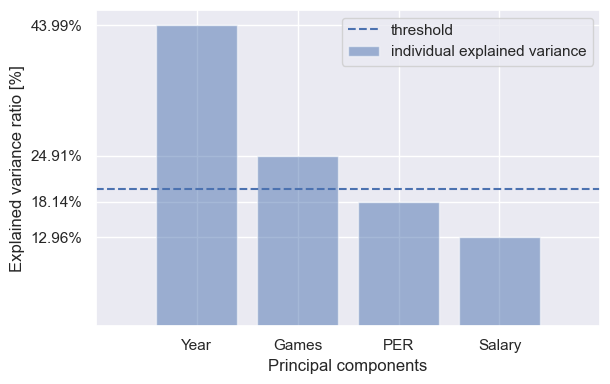

In [121]:
plt.figure(figsize=(6, 4))

plt.bar(range(4), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.hlines(0.2, -1, 4, linestyles='--', label='threshold')
plt.ylabel('Explained variance ratio [%]')
plt.xlabel('Principal components')
plt.xlim(-1,4)
plt.legend(loc='best')
plt.tight_layout()
#plt.yscale('log')
plt.xticks([0,1,2,3],['Year','Games', 'PER','Salary'])
plt.yticks(explained_variance,['43.99%','24.91%','18.14%','12.96%']) #estandarizada
#plt.yticks(explained_variance,['52.71%','23.70%','13.53%','10.06%']) #normalizada


plt.show()

### The Dataframe of the main components chosen (Year and Games) is obtained.

In [122]:
pca=PCA(n_components=2)
X_new=pca.fit_transform(X)

In [123]:
df_pca = pd.DataFrame(X_new, columns=['PC1 (Year)','PC2 (Games)']) # PC=principal component
df_pca

,PC1 (Year),PC2 (Games)
0,1.576311,5.932418
1,1.371976,5.787360
2,1.085481,5.739838
3,1.700020,5.574767
4,1.222390,5.917648
...,...,...
3314,0.103861,-0.744006
3315,-0.397577,-0.854089
3316,-2.440429,-0.541019
3317,-1.955821,-0.470439


### The Dataframe is obtained where the main components are joined with the categorical variable 'Pos'

In [124]:
df_pca_final = pd.concat([df_pca, y], axis = 1)
df_pca_final

,PC1 (Year),PC2 (Games),Pos
0,1.576311,5.932418,PG
1,1.371976,5.787360,PG
2,1.085481,5.739838,SG
3,1.700020,5.574767,PG
4,1.222390,5.917648,PG
...,...,...,...
3314,0.103861,-0.744006,PF
3315,-0.397577,-0.854089,C
3316,-2.440429,-0.541019,C
3317,-1.955821,-0.470439,SF


In [125]:
df_pca_final.head(10)

,PC1 (Year),PC2 (Games),Pos
0,1.576311,5.932418,PG
1,1.371976,5.787360,PG
2,1.085481,5.739838,SG
3,1.700020,5.574767,PG
4,1.222390,5.917648,PG
5,1.198358,5.914701,PF
6,1.351926,5.568914,PG
7,1.519359,5.403338,PG
8,0.106623,5.642539,PG
9,1.727209,5.694011,PF


### Finally, the PCA is graphed (at the end I will give my conclusions)

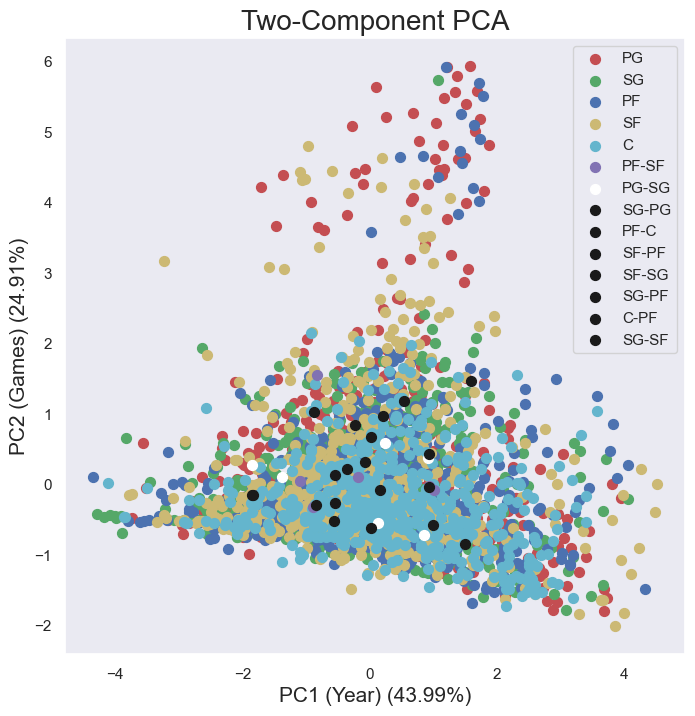

In [126]:
# Plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
explained = np.around(pca.explained_variance_ratio_*100, 2)
ax.set_xlabel('PC1 (Year) ({}%)'.format(explained[0]), fontsize = 15)
ax.set_ylabel('PC2 (Games) ({}%)'.format(explained[1]), fontsize = 15)
ax.set_title('Two-Component PCA', fontsize = 20)
targets = ['PG', 'SG', 'PF', 'SF', 'C', 'PF-SF', 'PG-SG', 'SG-PG', 'PF-C', 'SF-PF', 'SF-SG' , 'SG-PF', 'C-PF', 'SG-SF']
colors = ['r', 'g', 'b','y','c','m','w','k','k','k','k','k','k','k']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca_final['Pos'] == target
    ax.scatter(df_pca_final.loc[indicesToKeep, 'PC1 (Year)']
               , df_pca_final.loc[indicesToKeep, 'PC2 (Games)']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# CONCLUSION
### As can be observed, the PCA method does not seem to be the most appropriate to observe the results or make an analysis, I think it is because there are too many positions and they are very unbalanced, there is no uniformity or something similar (such as can be seen in the following cells)

In [127]:
df_pca_final.shape

(3319, 3)

In [128]:
df_pca_final['Pos'].value_counts()

PG       735
SG       722
PF       657
SF       628
C        545
PF-SF      6
PG-SG      6
SG-PG      5
PF-C       4
SF-PF      4
SF-SG      3
SG-PF      2
C-PF       1
SG-SF      1
Name: Pos, dtype: int64

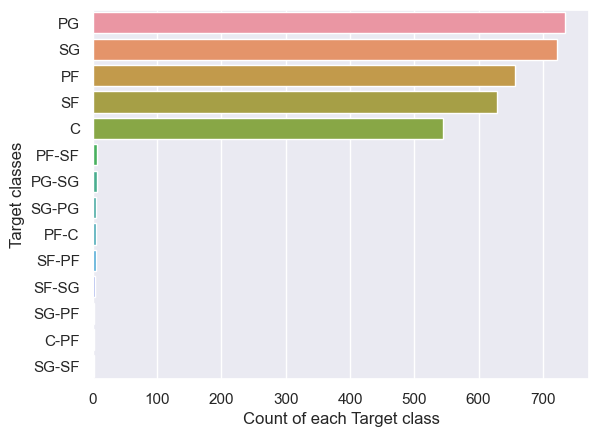

In [129]:
sns.countplot(y=df_resumen.Pos, data=df_pca_final, order = df_pca_final['Pos'].value_counts().index)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

# SOLUTION
### An apparent solution could be to eliminate all the positions that do not have as much impact (that have few records) and stay with the first 5, which are the ones that provide the most data (PG, SG, PF, SF and C).

### These would be the positions that are going to be eliminated.

In [130]:
filter_list = ['PF-SF', 'PG-SG', 'SG-PG', 'PF-C', 'SF-PF', 'SF-SG', 'SG-PF', 'C-PF', 'SG-SF']
df_pca_final[df_pca_final.Pos.isin(filter_list)]

,PC1 (Year),PC2 (Games),Pos
182,1.602509,1.470050,SF-SG
231,-0.828030,1.553784,PF-SF
307,0.539068,1.181756,SG-PF
428,0.211012,0.977860,SG-PF
492,-0.871924,1.030807,SG-PG
501,0.923995,0.377135,PG-SG
575,0.936508,0.429086,PF-C
584,-0.233192,0.845900,SF-SG
806,-0.069320,0.324313,SF-SG
854,0.238207,0.585579,PG-SG


In [131]:
df_pca_final['Pos'].value_counts()[filter_list]

PF-SF    6
PG-SG    6
SG-PG    5
PF-C     4
SF-PF    4
SF-SG    3
SG-PF    2
C-PF     1
SG-SF    1
Name: Pos, dtype: int64

### This would be the list of indices to be removed.

In [132]:
lista_pos_a_eliminar = df_pca_final[df_pca_final.Pos.isin(filter_list)].index.tolist()
lista_pos_a_eliminar

[182,
 231,
 307,
 428,
 492,
 501,
 575,
 584,
 806,
 854,
 859,
 877,
 901,
 979,
 1046,
 1305,
 1349,
 1399,
 1413,
 1431,
 1502,
 1735,
 1836,
 1849,
 1970,
 2081,
 2150,
 2181,
 2186,
 2238,
 2407,
 3036]

### Records are deleted

In [133]:
#df_pca_final.drop(axis=0, index = lista_pos_a_eliminar, inplace = True)
df_pca_final.drop(index = lista_pos_a_eliminar, inplace = True)

### It is verified that they have been removed.

In [134]:
df_pca_final.shape

(3287, 3)

In [135]:
df_pca_final['Pos'].value_counts()

PG    735
SG    722
PF    657
SF    628
C     545
Name: Pos, dtype: int64

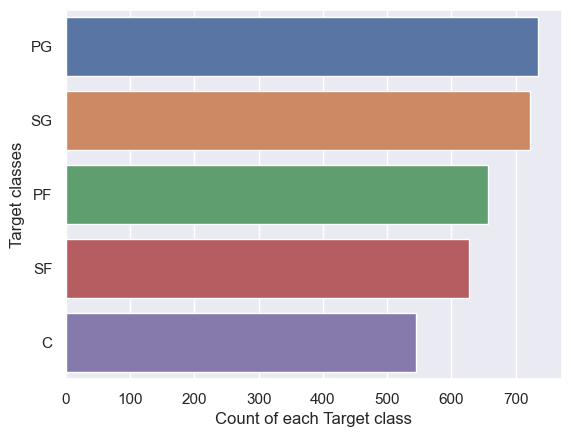

In [138]:
sns.countplot(y=df_resumen.Pos, data=df_pca_final, order = df_pca_final['Pos'].value_counts().index)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [139]:
df_pca_final

,PC1 (Year),PC2 (Games),Pos
0,1.576311,5.932418,PG
1,1.371976,5.787360,PG
2,1.085481,5.739838,SG
3,1.700020,5.574767,PG
4,1.222390,5.917648,PG
...,...,...,...
3314,0.103861,-0.744006,PF
3315,-0.397577,-0.854089,C
3316,-2.440429,-0.541019,C
3317,-1.955821,-0.470439,SF


### The PCA is performed again to see if there are any differences.

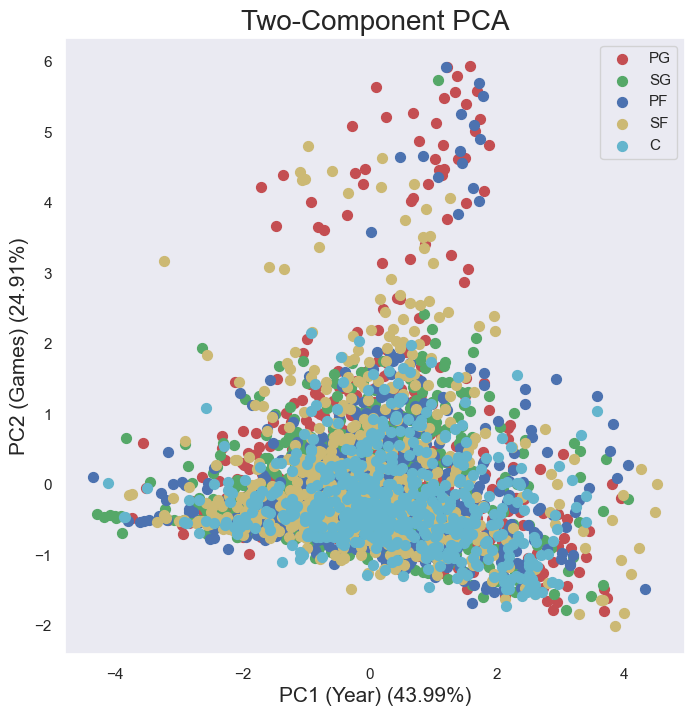

In [140]:
# Plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
explained = np.around(pca.explained_variance_ratio_*100, 2)
ax.set_xlabel('PC1 (Year) ({}%)'.format(explained[0]), fontsize = 15)
ax.set_ylabel('PC2 (Games) ({}%)'.format(explained[1]), fontsize = 15)
ax.set_title('Two-Component PCA', fontsize = 20)
targets = ['PG', 'SG', 'PF', 'SF', 'C']
colors = ['r', 'g', 'b','y','c']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca_final['Pos'] == target
    ax.scatter(df_pca_final.loc[indicesToKeep, 'PC1 (Year)']
               , df_pca_final.loc[indicesToKeep, 'PC2 (Games)']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## In the end it was useless, so we would have to look for another method different from PCA in my opinion and experience.